In [1]:
# !pip install pytimeparse
import pytimeparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# pd.set_option('max_rows', 40)
origDF = pd.read_csv('/home/singhj/comp205/comp205/stash/xx-exams/data/comp-205-2020-12-grades.csv').fillna(0)
# origDF

In [3]:
cols = origDF.columns.tolist()
df1 = origDF
ignore_score = []
for idx in range(len(cols)):
    if cols[idx][:5] in ['02-13', '02-14', '02-15']:
        ignore_score.append(cols[idx])
# print ('ignoring', ignore_score)
df1.drop(columns = ignore_score, inplace=True)
cols = df1.columns.tolist()
renames = {}
for idx in range(len(cols)):
    renames[cols[idx]] = cols[idx].replace(' ','-')
df2 = df1.rename(columns=renames)
#df2

In [4]:
# Calculating the maximum number of points for the semester

cols2 = df2.columns.tolist()
max_cols = []
for idx in range(len(cols2)):
    if 'Max-Points' in cols2[idx]:
        max_cols.append(idx)
max_cols
max_pts = df2.iloc[:,max_cols]
import numpy as np
total_max_points = sum(np.array(max_pts).tolist()[0])
# total_max_points 

In [5]:
# Due to a family emergency, Christian North wasn't able to submit some of the assignments on time
# He was given special dispensation for submitting late without penalty
df2.loc[df2['Email'] == 'christian.north@tufts.edu','03-04-dataframes-in-pandas---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','03-05-pandas-merging-dataframes---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','quiz2-2020---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','04-01-visualization---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','04-01-viz-seaborn---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','04-02-analysis-of-observations---Lateness-(H:M:S)'] = '00:00:00'
df2.loc[df2['Email'] == 'christian.north@tufts.edu','05-01-world-happiness---Lateness-(H:M:S)'] = '00:00:00'

# north = df2[df2['Email'] == 'christian.north@tufts.edu']
# north.transpose()

In [6]:
# Application of late penalty

def adjust(strTime):
    #print ('strTime', strTime)
    t_hours = pytimeparse.timeparse.timeparse(strTime)/3600
    if t_hours == 0:
        return 1.0
    elif t_hours <= 24:
        return 0.95
    elif t_hours <= 60:
        return 0.85
    else:
        return 0.00

dropcols = []
cols2 = df2.columns.tolist()
for idx in range(len(cols2)):
    if cols2[idx].startswith('Total'):
        dropcols.append(cols2[idx])
    elif 'Lateness' in cols2[idx]:
        prefix = cols2[idx][0:7]
        df2[prefix+'-adj'] = df2[cols2[idx]].apply(adjust)              # Points adjustment factor
        df2[prefix+'-pts'] = df2[prefix+'-adj'] * df2[cols2[idx-3]]     # Net Points after adjustment
        dropcols.extend([cols2[idx-3], cols2[idx-2], cols2[idx-1], cols2[idx]])
        dropcols.append(prefix+'-adj')

# dropcols.append('Total-pts')
# print ('dropcols', dropcols)
df3 = df2.drop(columns = dropcols)
#df3

In [7]:
# Calculation of totals
df4 = df3
scorecols = df3.shape[1]
df4['total']=df3.iloc[:,3:(2+scorecols)].sum(axis=1)
df4.sort_values(by=['total'], inplace=True, ascending=False)
# df4

In [8]:
# Samples and Special dispensations
# Stephen Consoles is here as a representative of an above-average student
pd.set_option('display.max_rows', 500)
df5 = df4
# Yule Hui missed some of the early assignments and I told her we would not count them,
# and only consider the later ones when assigning final grades.
# total_max_points is the best someone could do. 
# Her total is:
print (df5.loc[df4['Name'] == 'yule hui','total'])

# We multiply Yule Hui's total by (total_max_points/(total_max_points-80)) for the her final total
# But her failure to do well on quizzes 2 and 4 hurt her.
df5.loc[df4['Name'] == 'yule hui','total'] *= (total_max_points/(total_max_points-80))
special = df5[(df5['Email'] == 'christian.north@tufts.edu') | \
              (df5['Email'] == 'stephen.consoles@tufts.edu') | \
              (df5['Email'] == 'yule.hui@tufts.edu') \
             ]
special.transpose()

29    398.4
Name: total, dtype: float64


,17,4,29
Name,Stephen Consoles,Christian North,yule hui
SID,0,0,1335817
Email,stephen.consoles@tufts.edu,christian.north@tufts.edu,yule.hui@tufts.edu
COMP-20-pts,10,10,0
01-02-z-pts,10,8.5,0
01-03-z-pts,8.93,9.5,0
01-04-n-pts,9,9,0
01-05-n-pts,10,10,0
01-06-l-pts,10,9.4,0
01-07-c-pts,10,10,0


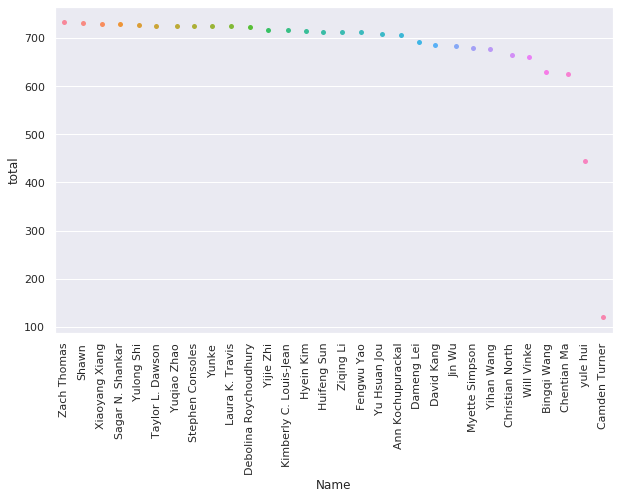

In [9]:
sns.set(rc={'figure.figsize':(10,6)})
sns.stripplot(x = "Name", y = "total", data = df5)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
gph = plt.show()
gph

In [10]:
df6 = df5
def grade(total):
    if total > 700: return 'A'
    elif total > 680: return 'A-'
    elif total > 660: return 'B+'
    elif total > 600: return 'B'
    return 'C'
df6['Grade']=df5['total'].apply(grade)
df6 = df6[["Name", "Email", "total", "Grade"]].reset_index()
df6

,index,Name,Email,total,Grade
0,27,Zach Thomas,zachary.thomas@tufts.edu,734.150000,A
1,16,Shawn,yuchen.lu@tufts.edu,730.550000,A
2,20,Xiaoyang Xiang,xiaoyang.xiang@tufts.edu,729.017500,A
3,15,Sagar N. Shankar,sagar.shankar@tufts.edu,729.000000,A
4,24,Yulong Shi,yulong.shi@tufts.edu,727.150000,A
5,18,Taylor L. Dawson,taylor.dawson@tufts.edu,726.100000,A
6,26,Yuqiao Zhao,yuqiao.zhao@tufts.edu,725.950000,A
7,17,Stephen Consoles,stephen.consoles@tufts.edu,725.880000,A
8,25,Yunke,yunke.zhu@tufts.edu,725.750000,A
9,13,Laura K. Travis,laura.travis@tufts.edu,725.200000,A
